In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('/content/Cleaned_Reviews.csv')

In [47]:
df

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,HelpfulnessRatio,ReviewLength,ReviewDate,ReviewYear
0,B000JZYM8C,A242NQPTHNV2EN,6,17,1,1185840000,Yuck!,This was the first Larabar product that I trie...,first larabar product tried awful bar smelled ...,0.352941,48,2007-07-31,2007
1,B005CUU23S,ADP8ROI8NMNL2,1,7,1,1322524800,What?,This was not at all what I expected. It was li...,not expected like oldschool rollon deoderant 1...,0.142857,140,2011-11-29,2011
2,B000U96JEC,AHTZWRRB06B78,0,0,1,1350950400,overprices and faulty weight advertiesed,Walden Farms dressings are very tasty. When I...,walden farm dressing tasty ordered said 12 12o...,0.000000,52,2012-10-23,2012
3,B004EE0TYK,AHRASE2UFPFKK,0,0,1,1330214400,Mocha K-Cup,A little too sweet for us. However we had no p...,little sweet u however no problem swapping fri...,0.000000,59,2012-02-26,2012
4,B0002QEFEE,AZ4UBAIST96L7,0,0,1,1316908800,Ruined our meal. Anyone actually eat this stuff?,We purhcased a can of this sauce from Walmart ...,purhcased sauce walmart make enchilada no wou...,0.000000,52,2011-09-25,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139426,B000CQIDK6,A3M31G4GJ9066T,1,1,5,1270684800,Great tea,I've not been a big tea drinker but wanted to ...,not big tea drinker wanted health benefit drin...,1.000000,68,2010-04-08,2010
139427,B004FEN3GA,A2XIOXRRYX0KZY,0,0,5,1305676800,Surprisingly Good,I can't exactly tell you what it was that I ex...,not exactly tell expected agreed sample review...,0.000000,136,2011-05-18,2011
139428,B002R6X1K6,A12PHXNMV20YTE,0,0,5,1345334400,The best pizza I have ever had!,I was so excited to get my whole wheat pizza d...,excited get whole wheat pizza dough ordering g...,0.000000,76,2012-08-19,2012
139429,B000YT3MHK,A2ZDMIP49N36UJ,4,4,5,1312329600,Best Raspberry Syrup,"Out of the three syrup that I have tried, this...",three syrup tried far best raspberry syrup tri...,1.000000,78,2011-08-03,2011


In [48]:
df.isnull().sum()

,0
ProductId,0
UserId,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,26
Text,0
Cleaned_Text,1
HelpfulnessRatio,0


In [51]:
# Ensure all values in 'Text' are strings and handle NaN or None
df['Text'] = df['Text'].fillna('').astype(str)

# Calculate text lengths
df['TextLength'] = df['Text'].apply(len)

# Display results
print(df[['Text', 'TextLength']].head())


                                                Text  TextLength
0  This was the first Larabar product that I trie...         278
1  This was not at all what I expected. It was li...         763
2  Walden Farms dressings are very tasty.  When I...         301
3  A little too sweet for us. However we had no p...         338
4  We purhcased a can of this sauce from Walmart ...         270


In [52]:
# Define sentiment based on 'Score'
def get_sentiment(score):
    if score >= 4:
        return 'Positive'
    elif score <= 2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Score'].apply(get_sentiment)

In [53]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    55999
Negative    55981
Neutral     27451
Name: count, dtype: int64


In [56]:
# Map sentiments to numerical labels
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}

# Apply the mapping to create a new column
df['SentimentLabel'] = df['Sentiment'].map(sentiment_mapping)

# Display the updated DataFrame
print(df[['Score', 'Sentiment', 'SentimentLabel']].head())

   Score Sentiment  SentimentLabel
0      1  Negative               0
1      1  Negative               0
2      1  Negative               0
3      1  Negative               0
4      1  Negative               0


In [55]:
df

,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_Text,HelpfulnessRatio,ReviewLength,ReviewDate,ReviewYear,ReviewMonth,TextLength,Sentiment
0,B000JZYM8C,A242NQPTHNV2EN,6,17,1,2007-07-31,Yuck!,This was the first Larabar product that I trie...,first larabar product tried awful bar smelled ...,0.352941,48,2007-07-31,2007,7,278,Negative
1,B005CUU23S,ADP8ROI8NMNL2,1,7,1,2011-11-29,What?,This was not at all what I expected. It was li...,not expected like oldschool rollon deoderant 1...,0.142857,140,2011-11-29,2011,11,763,Negative
2,B000U96JEC,AHTZWRRB06B78,0,0,1,2012-10-23,overprices and faulty weight advertiesed,Walden Farms dressings are very tasty. When I...,walden farm dressing tasty ordered said 12 12o...,0.000000,52,2012-10-23,2012,10,301,Negative
3,B004EE0TYK,AHRASE2UFPFKK,0,0,1,2012-02-26,Mocha K-Cup,A little too sweet for us. However we had no p...,little sweet u however no problem swapping fri...,0.000000,59,2012-02-26,2012,2,338,Negative
4,B0002QEFEE,AZ4UBAIST96L7,0,0,1,2011-09-25,Ruined our meal. Anyone actually eat this stuff?,We purhcased a can of this sauce from Walmart ...,purhcased sauce walmart make enchilada no wou...,0.000000,52,2011-09-25,2011,9,270,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139426,B000CQIDK6,A3M31G4GJ9066T,1,1,5,2010-04-08,Great tea,I've not been a big tea drinker but wanted to ...,not big tea drinker wanted health benefit drin...,1.000000,68,2010-04-08,2010,4,357,Positive
139427,B004FEN3GA,A2XIOXRRYX0KZY,0,0,5,2011-05-18,Surprisingly Good,I can't exactly tell you what it was that I ex...,not exactly tell expected agreed sample review...,0.000000,136,2011-05-18,2011,5,710,Positive
139428,B002R6X1K6,A12PHXNMV20YTE,0,0,5,2012-08-19,The best pizza I have ever had!,I was so excited to get my whole wheat pizza d...,excited get whole wheat pizza dough ordering g...,0.000000,76,2012-08-19,2012,8,431,Positive
139429,B000YT3MHK,A2ZDMIP49N36UJ,4,4,5,2011-08-03,Best Raspberry Syrup,"Out of the three syrup that I have tried, this...",three syrup tried far best raspberry syrup tri...,1.000000,78,2011-08-03,2011,8,402,Positive


In [57]:
from sklearn.model_selection import train_test_split

# Choose the text feature for analysis
# Options: 'CleanText', 'CleanSummary', or 'CombinedCleanText'
# Here, we'll use 'CombinedCleanText' for a comprehensive input
X = df['Cleaned_Text']
y = df['SentimentLabel']

# Split the dataset: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintains the same distribution of classes in splits
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 111544
Testing set size: 27887


In [58]:
# Check for missing values in training and testing data
print(f"Missing values in X_train: {X_train.isnull().sum()}")
print(f"Missing values in X_test: {X_test.isnull().sum()}")

# Replace NaN values with empty strings
X_train = X_train.fillna("")
X_test = X_test.fillna("")

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,      # Maximum number of features
    ngram_range=(1,2),      # Unigrams and bigrams
    stop_words='english'    # Remove English stopwords
)

# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF feature matrix shape (Training): {X_train_tfidf.shape}")
print(f"TF-IDF feature matrix shape (Testing): {X_test_tfidf.shape}")

Missing values in X_train: 0
Missing values in X_test: 1
TF-IDF feature matrix shape (Training): (111544, 5000)
TF-IDF feature matrix shape (Testing): (27887, 5000)


In [59]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
# Train the model
lr_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model trained successfully.")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression model trained successfully.


In [25]:
from sklearn.svm import LinearSVC

# Initialize the Linear SVM model
svm_model = LinearSVC(
    random_state=42,
    multi_class='ovr'
)

# Train the model
svm_model.fit(X_train_tfidf, y_train)

print("SVM model trained successfully.")


SVM model trained successfully.


In [60]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model with optimized parameters for faster execution
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees in the forest
    max_depth=20,              # Maximum depth of each tree
    min_samples_split=10,      # Minimum number of samples required to split an internal node
    min_samples_leaf=5,        # Minimum number of samples required to be at a leaf node
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    n_jobs=-1,                 # Utilize all available CPU cores
    random_state=42,           # For reproducibility
    verbose=1                  # Verbosity level; set to 1 to monitor training progress
)

# Train the model
rf_model.fit(X_train_tfidf, y_train)

print("Random Forest model trained successfully.")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.4s


Random Forest model trained successfully.


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.3s finished


In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test_tfidf, y_test, model_name):
    """
    Evaluate a classification model's performance.

    Parameters:
    - model: Trained model object.
    - X_test_tfidf: Transformed test data (features).
    - y_test: Ground truth labels.
    - model_name: Name of the model (string).
    """
    # Predict on test data
    y_pred = model.predict(X_test_tfidf)

    # Evaluation metrics
    print(f"Evaluation Report for Model: {model_name}")
    print("=" * 50)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, F1-Score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

Evaluation Report for Model: Logistic Regression
Accuracy: 0.7290
Precision: 0.7111
Recall: 0.7290
F1-Score: 0.7123

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     11197
           1       0.54      0.31      0.39      5490
           2       0.76      0.84      0.80     11200

    accuracy                           0.73     27887
   macro avg       0.68      0.66      0.66     27887
weighted avg       0.71      0.73      0.71     27887


Confusion Matrix:
[[9239  763 1195]
 [2056 1695 1739]
 [1119  684 9397]]


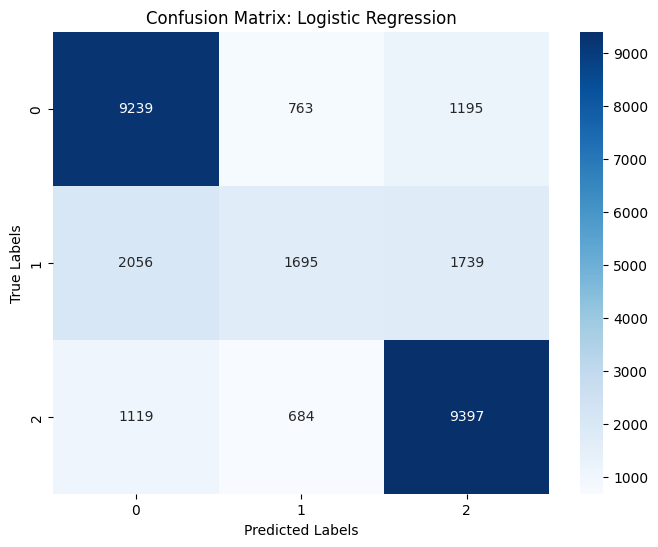

In [62]:
evaluate_model(lr_model, X_test_tfidf, y_test, model_name="Logistic Regression")

Evaluation Report for Model: SVM
Accuracy: 0.7272
Precision: 0.7089
Recall: 0.7272
F1-Score: 0.7073

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     11197
           1       0.56      0.28      0.38      5490
           2       0.75      0.84      0.80     11200

    accuracy                           0.73     27887
   macro avg       0.68      0.65      0.65     27887
weighted avg       0.71      0.73      0.71     27887


Confusion Matrix:
[[9271  654 1272]
 [2117 1556 1817]
 [1164  583 9453]]


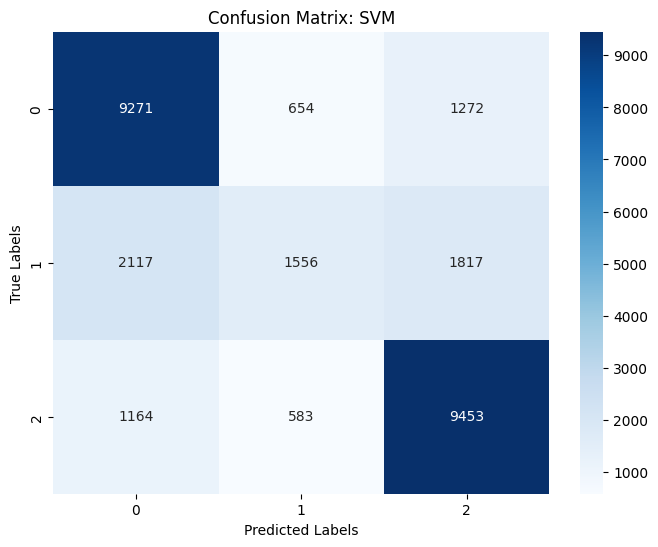

In [63]:
evaluate_model(svm_model, X_test_tfidf, y_test, model_name="SVM")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


Evaluation Report for Model: Random Forest
Accuracy: 0.6569
Precision: 0.7241
Recall: 0.6569
F1-Score: 0.5875

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.80      0.72     11197
           1       1.00      0.01      0.02      5490
           2       0.65      0.84      0.73     11200

    accuracy                           0.66     27887
   macro avg       0.77      0.55      0.49     27887
weighted avg       0.72      0.66      0.59     27887


Confusion Matrix:
[[8908    0 2289]
 [2778   46 2666]
 [1834    0 9366]]


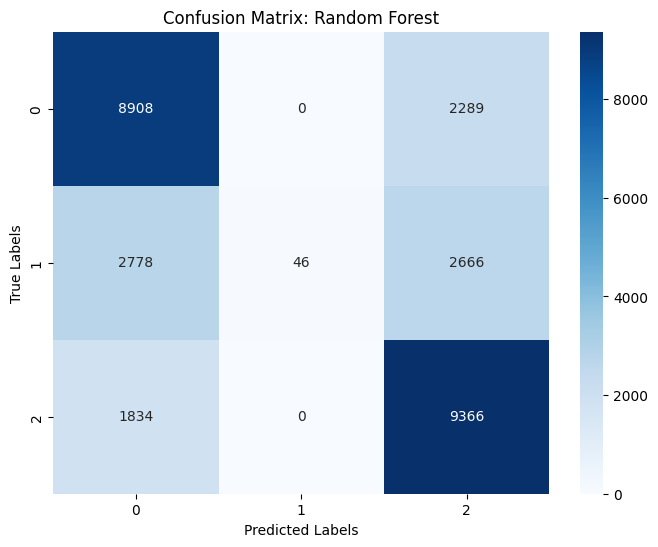

In [64]:
# Evaluate the Random Forest model
evaluate_model(rf_model, X_test_tfidf, y_test, model_name="Random Forest")

In [65]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch

# Parameters
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 3
LEARNING_RATE = 2e-5

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Ensure X and y are defined (e.g., df['Text'] and df['Sentiment_Numerical'])
X = df['Cleaned_Text']
y = df['SentimentLabel']

# Ensure X contains only strings
df['Cleaned_Text'] = df['Cleaned_Text'].astype(str)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all entries in X_train and X_test are strings
X_train = X_train.astype(str)
X_test = X_test.astype(str)

# Tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Dataset class
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            truncation=True,
            max_length=self.max_len,
            padding="max_length",
            return_tensors="pt"
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }
# Prepare datasets
train_dataset = SentimentDataset(X_train, y_train, tokenizer, MAX_LEN)
test_dataset = SentimentDataset(X_test, y_test, tokenizer, MAX_LEN)
# Data loaders
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=data_collator)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=data_collator)
# Load model
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)  # 3 labels: Positive, Neutral, Negative
model.to(device)
# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
# Mixed precision training setup
from torch.cuda.amp import GradScaler, autocast
scaler = GradScaler()
# Training function
def train_model(model, train_loader, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            with autocast():  # Enable mixed precision
                outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            total_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {total_loss / len(train_loader):.4f}")
# Evaluation function
def evaluate_model(model, test_loader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=-1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    print(classification_report(true_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))
# Train and evaluate
print("Training...")
train_model(model, train_loader, optimizer, EPOCHS)
print("\nEvaluating...")
evaluate_model(model, test_loader)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-65-aa2596439033>:79: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-65-aa2596439033>:92: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():  # Enable mixed precision


Training...
Epoch 1/3 - Loss: 0.6138
Epoch 2/3 - Loss: 0.4378
Epoch 3/3 - Loss: 0.3091

Evaluating...
              precision    recall  f1-score   support

    Negative       0.90      0.79      0.84     11274
     Neutral       0.54      0.73      0.62      5423
    Positive       0.90      0.86      0.88     11190

    accuracy                           0.81     27887
   macro avg       0.78      0.79      0.78     27887
weighted avg       0.83      0.81      0.81     27887



              precision    recall  f1-score   support

    Negative       0.90      0.79      0.84     11274
     Neutral       0.54      0.73      0.62      5423
    Positive       0.90      0.86      0.88     11190

    accuracy                           0.81     27887
   macro avg       0.78      0.79      0.78     27887
weighted avg       0.83      0.81      0.81     27887



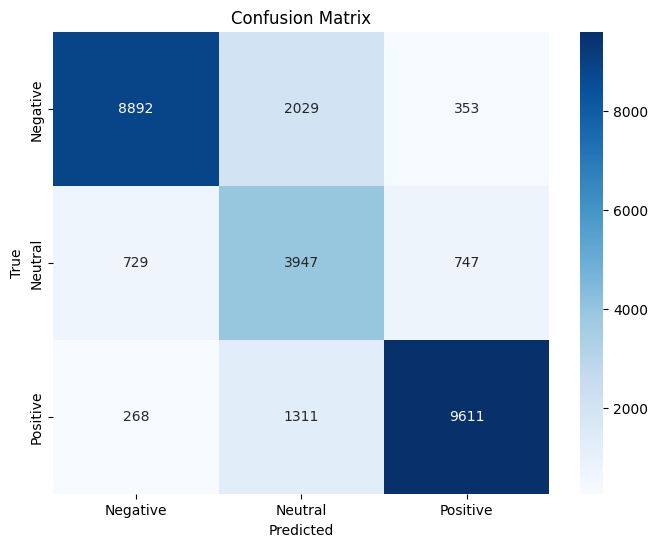

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predictions, class_names):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Modified evaluate_model function to include confusion matrix
def evaluate_model_with_confusion_matrix(model, test_loader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=-1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Print classification report
    print(classification_report(true_labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))

    # Plot confusion matrix
    plot_confusion_matrix(true_labels, predictions, class_names=['Negative', 'Neutral', 'Positive'])

# Call the function to evaluate and plot confusion matrix
evaluate_model_with_confusion_matrix(model, test_loader)